# Task 1

Extract a subset of traning samples from the MNIST handwriten signatures. Create a small convolution neural network with two convolution layers, two pool layers, flatten, dense layer and softmax layer to classify the images. Find out classification error for learning set and testing set.



In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Loading data and spliting the data
#Load and split dataset =https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data

data = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = data.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
# standard python array slicing to reduce size of data
#https://www.w3schools.com/python/numpy/numpy_array_slicing.asp

# --- For the Training Set ---

# 1. Get the total number of samples
num_train_samples = len(x_train)

# 2. Create 10,000 random, unique indices from 0 to num_train_samples
#    replace=False ensures we don't pick the same sample twice.
train_indices = np.random.choice(num_train_samples, 10000, replace=False)

# 3. Select the elements at those random indices
x_train = x_train[train_indices]
y_train = y_train[train_indices]


# --- For the Test Set ---

# 1. Get the total number of test samples
num_test_samples = len(x_test)

# 2. Create 1,000 random, unique indices
test_indices = np.random.choice(num_test_samples, 1000, replace=False)

# 3. Select the elements at those random indices
x_test = x_test[test_indices]
y_test = y_test[test_indices]


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)
(1000, 28, 28)
(1000,)


In [5]:
# A standar Con2d has 4 inputs but our data has only 3 we add a 4th by applying reshape and adding channel here, greyscale images have channel 1 if it was RGB it would be 3
# why /255 becuase gray scale have 255 pixels so we scale the input to smaller scales
# to_catagorical is applied as one hot encodeing

x_train = x_train.reshape(-1,28,28,1)
x_train = x_train.astype('float32')/255

x_test = x_test.reshape(-1,28,28,1)
x_test = x_test.astype('float32')/255

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# https://www.tensorflow.org/datasets/keras_example Basic outline of the flow
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
# reffer https://www.youtube.com/watch?v=VPlFpvLOgtQ

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=5, activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(32,kernel_size=5,activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(10,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# https://www.tensorflow.org/api_docs/python/tf/keras/Model last compile part

model.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
# https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit


print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

history = model.fit(x_train, y_train, epochs = 8, validation_data=(x_test, y_test))

Shape of x_train: (10000, 28, 28, 1)
Shape of y_train: (10000, 10)
Shape of x_test: (1000, 28, 28, 1)
Shape of y_test: (1000, 10)
Epoch 1/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.7171 - loss: 0.9396 - val_accuracy: 0.9570 - val_loss: 0.1282
Epoch 2/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9541 - loss: 0.1481 - val_accuracy: 0.9760 - val_loss: 0.0846
Epoch 3/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9732 - loss: 0.0902 - val_accuracy: 0.9810 - val_loss: 0.0576
Epoch 4/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9792 - loss: 0.0664 - val_accuracy: 0.9790 - val_loss: 0.0675
Epoch 5/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9862 - loss: 0.0462 - val_accuracy: 0.9840 - val_loss: 0.0516
Epoch 6/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9905 - loss: 0.0344 - val_accuracy: 0.9850 - val_loss: 0.0445
Epoch 7/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9927 - loss: 0.0255 - val_accuracy

In [9]:
model.summary()

print("Training loss:", history.history['loss'][-1],
      "Training accuracy:", history.history['accuracy'][-1])
result = model.evaluate(x_test, y_test)
print("Testing loss:", result[0], "Testing accuracy:", result[1])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 32)       │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,784 (370.25 KB)

 Trainable params: 31,594 (123.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,190 (246.84 KB)

Training loss: 0.02567242458462715 Training accuracy: 0.9921000003814697
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9840 - loss: 0.0490
Testing loss: 0.04875149950385094 Testing accuracy: 0.9850000143051147


In [10]:
tf.math.confusion_matrix(y_test.argmax(axis=1), model.predict(x_test).argmax(axis=1))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[117,   0,   0,   0,   0,   0,   2,   0,   0,   0],
       [  0, 102,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0, 106,   0,   0,   1,   0,   0,   0,   0],
       [  1,   0,   0, 100,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 106,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,  76,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,  90,   0,   0,   0],
       [  0,   0,   1,   0,   0,   0,   0, 112,   0,   0],
       [  2,   0,   1,   0,   0,   0,   0,   0,  87,   0],
       [  0,   0,   0,   0,   2,   0,   0,   1,   0,  89]], dtype=int32)>

In [11]:
for y in  range (28):
  for x in range (28):
    print('#' if x_train[0][y][x]>5 else '.', end='')
  print()

............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................
............................


# Task 2

Create an autoencoder for MNIST fashion dataset. The input and the output is the same image of a number 28x28 pixels.



In [41]:
# https://www.youtube.com/watch?v=gK-9v4lTEfY

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input , Dense, Conv2D
from tensorflow.keras.datasets import fashion_mnist

In [42]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalise the data into smaller pixel values for better neursl network performance

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [55]:
num_train_samples = len(x_train)

# 2. Create 10,000 random, unique indices from 0 to num_train_samples
#    replace=False ensures we don't pick the same sample twice.
train_indices = np.random.choice(num_train_samples, 10000, replace=False)

# 3. Select the elements at those random indices
x_train = x_train[train_indices]


# --- For the Test Set ---

# 1. Get the total number of test samples
num_test_samples = len(x_test)

# 2. Create 1,000 random, unique indices
test_indices = np.random.choice(num_test_samples, 1000, replace=False)

# 3. Select the elements at those random indices
x_test = x_test[test_indices]



print(x_train.shape)
print(x_test.shape)


(10000, 28, 28)
(1000, 28, 28)


In [44]:
from tensorflow.keras import layers,Input

# Load image of 28 x 28 size of grey scale image so '1'
input = Input(shape=(28,28,1))

encoded = layers.Conv2D(32, (3,3), activation='relu', padding='same')(input)

encoded= layers.MaxPooling2D((2,2), padding='same')(encoded)

encoded = layers.Conv2D(32, (3,3), activation='relu', padding='same')(encoded)

encoded_output = layers.MaxPooling2D((2,2), padding='same')(encoded)

In [45]:
# Decodeing

decoded = layers.Conv2DTranspose(32, (3,3), strides=2, activation='relu', padding='same')(encoded_output)
decoded = layers.Conv2DTranspose(32, (3,3), strides=2, activation='relu', padding='same')(decoded)
decoded_output = layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')(decoded)


In [46]:
from tensorflow.keras.models import Model

autoencode = Model(input,decoded_output)

In [47]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

autoencode.compile(optimizer="adam", loss="binary_crossentropy")
autoencode.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 14, 14, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 28, 28, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,353 (110.75 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
history = autoencode.fit(x = x_train, y = x_train, epochs = 8, validation_data = (x_test, x_test))

Epoch 1/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 73ms/step - loss: 0.4095 - val_loss: 0.2767
Epoch 2/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - loss: 0.2770 - val_loss: 0.2701
Epoch 3/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step - loss: 0.2701 - val_loss: 0.2671
Epoch 4/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - loss: 0.2654 - val_loss: 0.2633
Epoch 5/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step - loss: 0.2638 - val_loss: 0.2606
Epoch 6/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 69ms/step - loss: 0.2594 - val_loss: 0.2584
Epoch 7/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 72ms/step - loss: 0.2590 - val_loss: 0.2570
Epoch 8/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - loss: 0.2570 - val_loss: 0.2561


In [50]:
model.summary()

print("Training loss:", history.history['loss'][-1] )
result = autoencode.evaluate(x_test, x_test)
print("Testing loss:", result)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 32)       │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,784 (370.25 KB)

 Trainable params: 31,594 (123.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,190 (246.84 KB)

Training loss: 0.2569862902164459
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2555
Testing loss: 0.2560748755931854


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


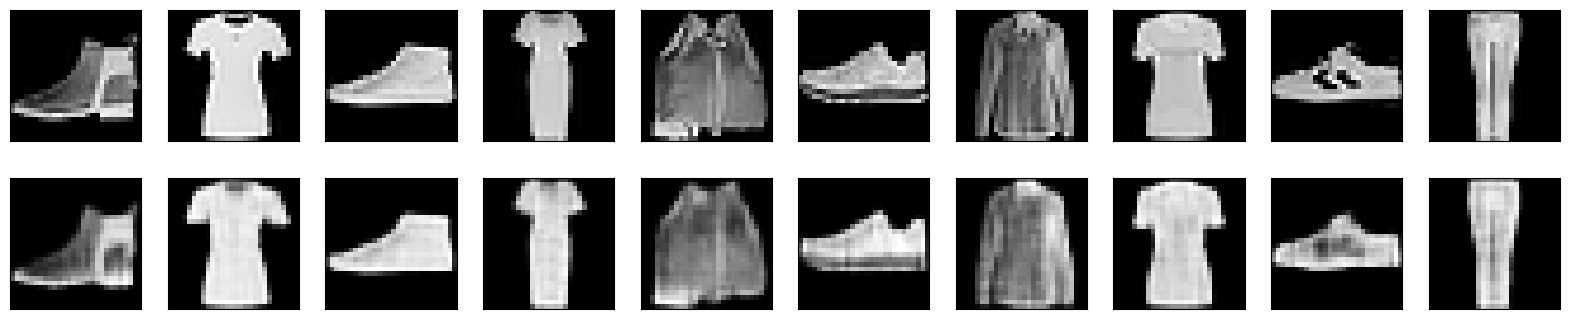

In [51]:
# Encode and decode some digits

# Define the encoder model
encoder = Model(inputs=input, outputs=encoded_output)

# Define the decoder model
decoder_input = Input(shape=encoded_output.shape[1:]) # Input shape for the decoder
decoder_output_layer = autoencode.layers[-1] # Get the last layer (output) of the autoencoder
# Recreate the decoder part of the autoencoder
x = autoencode.layers[-3](decoder_input)
x = autoencode.layers[-2](x)
decoded_output = decoder_output_layer(x)
decoder = Model(inputs=decoder_input, outputs=decoded_output)


encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Visualize the results
import matplotlib.pyplot as plt

n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [38]:
# Example
import tensorflow as tf
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
import random as rnd

t_x = []
t_y = []
sz = len(train_images)
for i in range(20):
   idx = rnd.randint(0,sz-1)
   for c in range(10):
     while train_labels[idx] != c:
       idx = rnd.randint(0,sz-1)
     t_x += [np.ndarray.flatten(train_images[idx])]
     t_y += [train_labels[idx]]

t_x = np.array(t_x, dtype=np.float32)/255.0



## Subtask 1

 Use two dense layers (hidden and output). Hidden layer with 2 neurons, output layer with 784 neurons. Plot the response of hidden neurons in scatter plot, number categories distinquish by colors.


In [58]:
data = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = data.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [59]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.



In [65]:
#Reshape the x_train and x_test array into 1 D of values (x_value, 784 (neuron size))
# This is done as dense layer require 1 d input
x_train_flat = x_train.reshape(len(x_train),784)
x_test_flat = x_test.reshape(len(x_test),784)

print(x_train_flat.shape)
print(x_test_flat.shape)

(60000, 784)
(10000, 784)


In [68]:
Total_sample_size = len(x_train_flat)

Random_indices = np.random.choice(Total_sample_size, 10000, replace=False)

x_train_flat = x_train_flat[Random_indices]

Total_sample_size_test = len(x_test_flat)

Random_indices_test = np.random.choice(Total_sample_size_test, 1000, replace=False)

x_test_flat = x_test_flat[Random_indices_test]


print(x_train_flat.shape)
print(x_test_flat.shape)

(10000, 784)
(1000, 784)


In [70]:
input = Input(shape=(784,))

encode = Dense(2, activation='relu')(input)

In [71]:
decode = Dense(784, activation='sigmoid')(encode)

In [72]:
auto_encode = Model(input, decode)

In [78]:
auto_encode.compile(optimizer='adam', loss='binary_crossentropy')
auto_encode.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 784)            │         2,352 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,922 (15.32 KB)

 Trainable params: 3,922 (15.32 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
auto_encode.fit(x_train_flat, x_train_flat, epochs=8, validation_data=(x_test_flat, x_test_flat))

Epoch 1/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2426 - val_loss: 0.2377
Epoch 2/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2409 - val_loss: 0.2368
Epoch 3/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2406 - val_loss: 0.2362
Epoch 4/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2403 - val_loss: 0.2356
Epoch 5/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2395 - val_loss: 0.2352
Epoch 6/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2389 - val_loss: 0.2344
Epoch 7/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2380 - val_loss: 0.2338
Epoch 8/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2365 - val_loss: 0.2337


In [80]:
auto_encode.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 784)            │         2,352 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,768 (45.97 KB)

 Trainable params: 3,922 (15.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,846 (30.65 KB)

In [ ]:
Write your code here


## Subtask 2

Modify Subtask 1 so that you add three hidden layers and 2 latent features, i.e.
784-10-2-10-784 neurons. Observe differences.



In [81]:
input_image_3 = Input(shape=(784,))

encode_3 = Dense(10, activation='relu')(input_image_3)

encode_3 = Dense(2, activation='relu')(encode_3)


In [83]:
decode_3 = Dense(10, activation='relu')(encode_3)

decoded_output_3 = Dense(784, activation='sigmoid')(decode_3)

In [84]:
auto_encode_3 = Model(input_image_3, decoded_output_3)



In [85]:
auto_encode_3.compile(optimizer='adam', loss='binary_crossentropy')
auto_encode_3.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            22 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 784)            │         8,624 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,526 (64.55 KB)

 Trainable params: 16,526 (64.55 KB)

 Non-trainable params: 0 (0.00 B)

In [86]:
auto_encode_3.fit(x_train_flat, x_train_flat, epochs=8,validation_data=(x_test_flat, x_test_flat))

Epoch 1/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4595 - val_loss: 0.2678
Epoch 2/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2698 - val_loss: 0.2625
Epoch 3/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2658 - val_loss: 0.2602
Epoch 4/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2625 - val_loss: 0.2582
Epoch 5/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2601 - val_loss: 0.2553
Epoch 6/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2580 - val_loss: 0.2529
Epoch 7/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2551 - val_loss: 0.2511
Epoch 8/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2527 - val_loss: 0.2477


In [87]:
auto_encode_3.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            22 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 784)            │         8,624 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,580 (193.68 KB)

 Trainable params: 16,526 (64.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,054 (129.12 KB)

## Subtask 3

Modify Subtask 1 so that you add convolution layers, pooling layers, ... for the autoencoder and observe differences.


In [ ]:
Write your code here


## Subtask 4

Extract the decoder from the autoencoder of subtask 1-3 and generate new images based on randomly generated latent features. Plot generated images.



In [ ]:
Write your code here